<a href="https://colab.research.google.com/github/POOJA1980/IMDb-NLP/blob/main/data_mining_and_predictive_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Planilha sem ttulo - cscpopendata.csv')

In [ ]:
df.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,41524,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,41523,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,41523,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,41523,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,41523,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114635 non-null  int64  
 1   ProductName             114635 non-null  object 
 2   CSFId                   80662 non-null   float64
 3   CSF                     80238 non-null   object 
 4   CompanyId               114635 non-null  int64  
 5   CompanyName             114635 non-null  object 
 6   BrandName               114419 non-null  object 
 7   PrimaryCategoryId       114635 non-null  int64  
 8   PrimaryCategory         114635 non-null  object 
 9   SubCategoryId           114635 non-null  int64  
 10  SubCategory             114635 non-null  object 
 11  CasId                   114635 non-null  int64  
 12  CasNumber               108159 non-null  object 
 13  ChemicalId              114635 non-null  int64  
 14  ChemicalName        

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CDPHId,114635.0,20304.858987,12489.052554,2.0,8717.0,20895.0,31338.50,41524.0
CSFId,80662.0,32608.658377,19089.443910,1.0,15789.0,32541.0,48717.75,65009.0
CompanyId,114635.0,450.641532,409.533093,4.0,86.0,297.0,798.00,1391.0
PrimaryCategoryId,114635.0,51.076294,20.474341,1.0,44.0,44.0,59.00,111.0
SubCategoryId,114635.0,66.819252,35.822097,3.0,48.0,52.0,65.00,172.0
CasId,114635.0,674.094107,149.214101,2.0,656.0,656.0,656.00,1242.0
ChemicalId,114635.0,32837.556959,20439.412299,0.0,13990.0,32055.0,51578.50,68074.0
ChemicalCount,114635.0,1.288359,0.636418,0.0,1.0,1.0,1.00,9.0


In [ ]:
#Check for null values in the dataset
df.isnull().sum()

CDPHId                         0
ProductName                    0
CSFId                      33973
CSF                        34397
CompanyId                      0
CompanyName                    0
BrandName                    216
PrimaryCategoryId              0
PrimaryCategory                0
SubCategoryId                  0
SubCategory                    0
CasId                          0
CasNumber                   6476
ChemicalId                     0
ChemicalName                   0
InitialDateReported            0
MostRecentDateReported         0
DiscontinuedDate          101715
ChemicalCreatedAt              0
ChemicalUpdatedAt              0
ChemicalDateRemoved       111650
ChemicalCount                  0
dtype: int64

In [ ]:
#Checking the number of unique values
df.select_dtypes(include='int64').nunique()

CDPHId               36972
CompanyId              635
PrimaryCategoryId       13
SubCategoryId           92
CasId                  134
ChemicalId           58079
ChemicalCount           10
dtype: int64

In [ ]:
#Checking the number of unique values
df.select_dtypes(include='object').nunique()

ProductName               33716
CSF                       34244
CompanyName                 606
BrandName                  2714
PrimaryCategory              13
SubCategory                  89
CasNumber                   125
ChemicalName                123
InitialDateReported        2274
MostRecentDateReported     2178
DiscontinuedDate            991
ChemicalCreatedAt          2320
ChemicalUpdatedAt          2326
ChemicalDateRemoved         524
dtype: int64

In [ ]:
#check duplicate values
df.duplicated().sum()

215

DATA PREPROCESS

In [ ]:
#drop the duplicated values
df.drop_duplicates()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,41524,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,41523,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,41523,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,41523,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,41523,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114630,5,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65001.0,Rosa Soft,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68059,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114631,4,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65002.0,Malva Spirit,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68060,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114632,3,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65003.0,Rojo Fashion,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68061,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114633,3,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65004.0,Terra Mystic,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68062,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1


In [ ]:
column_names = df.columns.tolist()
print("Column Names:")
print(column_names)

Column Names:
['CDPHId', 'ProductName', 'CSFId', 'CSF', 'CompanyId', 'CompanyName', 'BrandName', 'PrimaryCategoryId', 'PrimaryCategory', 'SubCategoryId', 'SubCategory', 'CasId', 'CasNumber', 'ChemicalId', 'ChemicalName', 'InitialDateReported', 'MostRecentDateReported', 'DiscontinuedDate', 'ChemicalCreatedAt', 'ChemicalUpdatedAt', 'ChemicalDateRemoved', 'ChemicalCount']


In [ ]:
# Calculate the percentage of missing values for each column
na_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to store the results
na_percentage_df = pd.DataFrame({'Column': na_percentage.index, 'Percentage': na_percentage.values})

# Sort the DataFrame in descending order based on the percentage of missing values
na_percentage_df = na_percentage_df.sort_values(by='Percentage', ascending=False)

# Print the results
print("Missing Value Counts (Percentage-wise, Descending Order):\n")
print(na_percentage_df)

Missing Value Counts (Percentage-wise, Descending Order):

                    Column  Percentage
20     ChemicalDateRemoved   97.396083
17        DiscontinuedDate   88.729446
3                      CSF   30.005670
2                    CSFId   29.635801
12               CasNumber    5.649235
6                BrandName    0.188424
0                   CDPHId    0.000000
13              ChemicalId    0.000000
19       ChemicalUpdatedAt    0.000000
18       ChemicalCreatedAt    0.000000
16  MostRecentDateReported    0.000000
15     InitialDateReported    0.000000
14            ChemicalName    0.000000
11                   CasId    0.000000
1              ProductName    0.000000
10             SubCategory    0.000000
9            SubCategoryId    0.000000
8          PrimaryCategory    0.000000
7        PrimaryCategoryId    0.000000
5              CompanyName    0.000000
4                CompanyId    0.000000
21           ChemicalCount    0.000000


In [ ]:
# Drop the not needed columns from the original DataFrame
df = df.drop(['ChemicalDateRemoved', 'DiscontinuedDate'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114635 non-null  int64  
 1   ProductName             114635 non-null  object 
 2   CSFId                   80662 non-null   float64
 3   CSF                     80238 non-null   object 
 4   CompanyId               114635 non-null  int64  
 5   CompanyName             114635 non-null  object 
 6   BrandName               114419 non-null  object 
 7   PrimaryCategoryId       114635 non-null  int64  
 8   PrimaryCategory         114635 non-null  object 
 9   SubCategoryId           114635 non-null  int64  
 10  SubCategory             114635 non-null  object 
 11  CasId                   114635 non-null  int64  
 12  CasNumber               108159 non-null  object 
 13  ChemicalId              114635 non-null  int64  
 14  ChemicalName        

In [ ]:
# Drop all rows with null values from the original DataFrame
df.dropna(inplace=True)

In [ ]:
#remove the columns which are the same, (cdphID & product name), (csfid &csf), (company id and company name), (primary category id and primary category), (sub category id and sub category),(CasNumber, CasID and Chemical Name)
df = df.drop(['CDPHId', 'CSFId','CompanyId','PrimaryCategoryId','ChemicalId','SubCategoryId','CasNumber','CasId'], axis=1)

# Display the updated DataFrame
df.head()

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,SubCategory,ChemicalName,InitialDateReported,MostRecentDateReported,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalCount
6,ABSOLUTE Precision Color Powder System - All S...,5858-81-1,OPI PRODUCTS INC.,OPI,Nail Products,Artificial Nails and Related Products,Titanium dioxide,07/13/2009,12/30/2010,12/04/2009,12/04/2009,1
7,ABSOLUTE Precision Color Powder System - All S...,D&C RED 7 CALCIUM LAKE,OPI PRODUCTS INC.,OPI,Nail Products,Artificial Nails and Related Products,Titanium dioxide,07/13/2009,12/30/2010,12/04/2009,12/04/2009,1
8,ABSOLUTE Precision Color Powder System - All S...,D&C RED 28,OPI PRODUCTS INC.,OPI,Nail Products,Artificial Nails and Related Products,Titanium dioxide,07/13/2009,12/30/2010,12/04/2009,12/04/2009,1
9,ABSOLUTE Precision Color Powder System Opaque ...,D&C RED 7 CALCIUM LAKE,OPI PRODUCTS INC.,ABSOLUTE,Nail Products,Artificial Nails and Related Products,Titanium dioxide,07/13/2009,12/30/2010,06/09/2010,06/09/2010,1
11,ABSOLUTE Precision Color Powder System Translu...,D&C RED 28,OPI PRODUCTS INC.,ABSOLUTE,Nail Products,Artificial Nails and Related Products,Titanium dioxide,07/13/2009,12/30/2010,06/09/2010,06/09/2010,1


In [ ]:
#Checking the number of unique values
df.select_dtypes(include='int64').nunique()

ChemicalCount    7
dtype: int64

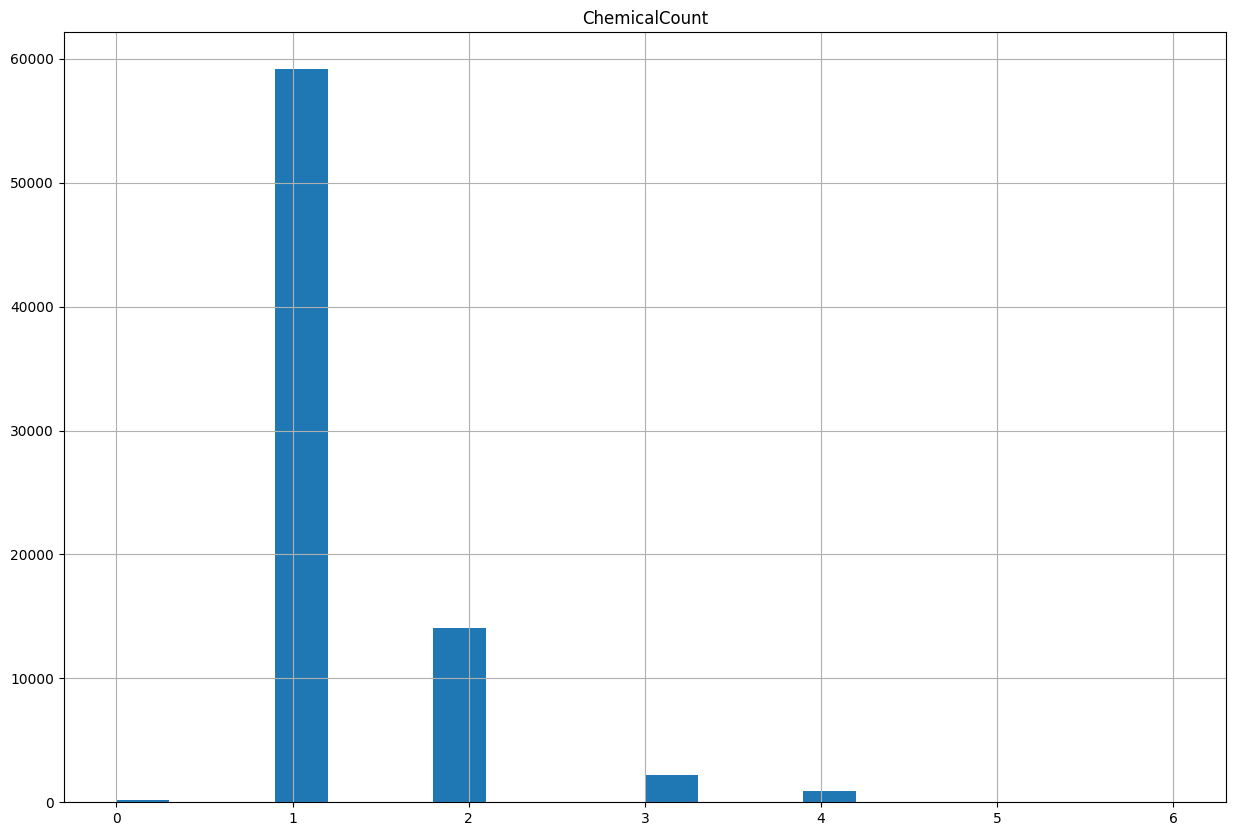

In [ ]:
numeric_columns = df.select_dtypes(include=['int64','float64'])
numeric_columns.hist(bins=20, figsize=(15, 10))
plt.show()

In [ ]:
# Convert date columns to datetime format
date_columns = ['InitialDateReported', 'MostRecentDateReported', 'ChemicalCreatedAt', 'ChemicalUpdatedAt']
for column in date_columns:
    df[column] = pd.to_datetime(df[column], errors='coerce')

# Extract year and month from date columns
for column in date_columns:
    df[column + '_Year'] = df[column].dt.year
    df[column + '_Month'] = df[column].dt.month

# Drop the original date columns
df.drop(date_columns, axis=1, inplace=True)

In [ ]:
df.head()

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported_Year,InitialDateReported_Month,MostRecentDateReported_Year,MostRecentDateReported_Month,ChemicalCreatedAt_Year,ChemicalCreatedAt_Month,ChemicalUpdatedAt_Year,ChemicalUpdatedAt_Month
6,ABSOLUTE Precision Color Powder System - All S...,5858-81-1,OPI PRODUCTS INC.,OPI,Nail Products,Artificial Nails and Related Products,Titanium dioxide,1,2009,7,2010,12,2009,12,2009,12
7,ABSOLUTE Precision Color Powder System - All S...,D&C RED 7 CALCIUM LAKE,OPI PRODUCTS INC.,OPI,Nail Products,Artificial Nails and Related Products,Titanium dioxide,1,2009,7,2010,12,2009,12,2009,12
8,ABSOLUTE Precision Color Powder System - All S...,D&C RED 28,OPI PRODUCTS INC.,OPI,Nail Products,Artificial Nails and Related Products,Titanium dioxide,1,2009,7,2010,12,2009,12,2009,12
9,ABSOLUTE Precision Color Powder System Opaque ...,D&C RED 7 CALCIUM LAKE,OPI PRODUCTS INC.,ABSOLUTE,Nail Products,Artificial Nails and Related Products,Titanium dioxide,1,2009,7,2010,12,2010,6,2010,6
11,ABSOLUTE Precision Color Powder System Translu...,D&C RED 28,OPI PRODUCTS INC.,ABSOLUTE,Nail Products,Artificial Nails and Related Products,Titanium dioxide,1,2009,7,2010,12,2010,6,2010,6


In [ ]:
# Drop the month columns
month_columns = [col for col in df.columns if '_Month' in col]
df.drop(month_columns, axis=1, inplace=True)
# Drop the 'CSF' column
df.drop('CSF', axis=1, inplace=True)

In [ ]:
# Check the number of unique values for each column
print(df.nunique())

ProductName                    8183
CompanyName                     276
BrandName                       747
PrimaryCategory                  13
SubCategory                      77
ChemicalName                     51
ChemicalCount                     7
InitialDateReported_Year         12
MostRecentDateReported_Year      11
ChemicalCreatedAt_Year           12
ChemicalUpdatedAt_Year           12
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76603 entries, 6 to 114633
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ProductName                  76603 non-null  object
 1   CompanyName                  76603 non-null  object
 2   BrandName                    76603 non-null  object
 3   PrimaryCategory              76603 non-null  object
 4   SubCategory                  76603 non-null  object
 5   ChemicalName                 76603 non-null  object
 6   ChemicalCount                76603 non-null  int64 
 7   InitialDateReported_Year     76603 non-null  int64 
 8   MostRecentDateReported_Year  76603 non-null  int64 
 9   ChemicalCreatedAt_Year       76603 non-null  int64 
 10  ChemicalUpdatedAt_Year       76603 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 7.0+ MB


In [ ]:
df.head()

,ProductName,CompanyName,BrandName,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported_Year,MostRecentDateReported_Year,ChemicalCreatedAt_Year,ChemicalUpdatedAt_Year
6,ABSOLUTE Precision Color Powder System - All S...,OPI PRODUCTS INC.,OPI,Nail Products,Artificial Nails and Related Products,Titanium dioxide,1,2009,2010,2009,2009
7,ABSOLUTE Precision Color Powder System - All S...,OPI PRODUCTS INC.,OPI,Nail Products,Artificial Nails and Related Products,Titanium dioxide,1,2009,2010,2009,2009
8,ABSOLUTE Precision Color Powder System - All S...,OPI PRODUCTS INC.,OPI,Nail Products,Artificial Nails and Related Products,Titanium dioxide,1,2009,2010,2009,2009
9,ABSOLUTE Precision Color Powder System Opaque ...,OPI PRODUCTS INC.,ABSOLUTE,Nail Products,Artificial Nails and Related Products,Titanium dioxide,1,2009,2010,2010,2010
11,ABSOLUTE Precision Color Powder System Translu...,OPI PRODUCTS INC.,ABSOLUTE,Nail Products,Artificial Nails and Related Products,Titanium dioxide,1,2009,2010,2010,2010


In [ ]:
# Create a label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each column in the DataFrame
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df.head()

,ProductName,CompanyName,BrandName,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported_Year,MostRecentDateReported_Year,ChemicalCreatedAt_Year,ChemicalUpdatedAt_Year
6,138,176,502,6,3,42,1,2009,2010,2009,2009
7,138,176,502,6,3,42,1,2009,2010,2009,2009
8,138,176,502,6,3,42,1,2009,2010,2009,2009
9,139,176,11,6,3,42,1,2009,2010,2010,2010
11,140,176,11,6,3,42,1,2009,2010,2010,2010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76603 entries, 6 to 114633
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   ProductName                  76603 non-null  int64
 1   CompanyName                  76603 non-null  int64
 2   BrandName                    76603 non-null  int64
 3   PrimaryCategory              76603 non-null  int64
 4   SubCategory                  76603 non-null  int64
 5   ChemicalName                 76603 non-null  int64
 6   ChemicalCount                76603 non-null  int64
 7   InitialDateReported_Year     76603 non-null  int64
 8   MostRecentDateReported_Year  76603 non-null  int64
 9   ChemicalCreatedAt_Year       76603 non-null  int64
 10  ChemicalUpdatedAt_Year       76603 non-null  int64
dtypes: int64(11)
memory usage: 7.0 MB


In [ ]:
# Create a new column for time difference
df['TimeDifference_Initial_MostRecent'] = df['MostRecentDateReported_Year'] - df['InitialDateReported_Year']
df['ChemicalUpdated'] =df['ChemicalUpdatedAt_Year'] - df['ChemicalCreatedAt_Year']
# Drop the original date columns
df.drop(['InitialDateReported_Year', 'MostRecentDateReported_Year','ChemicalCreatedAt_Year','ChemicalUpdatedAt_Year'], axis=1, inplace=True)

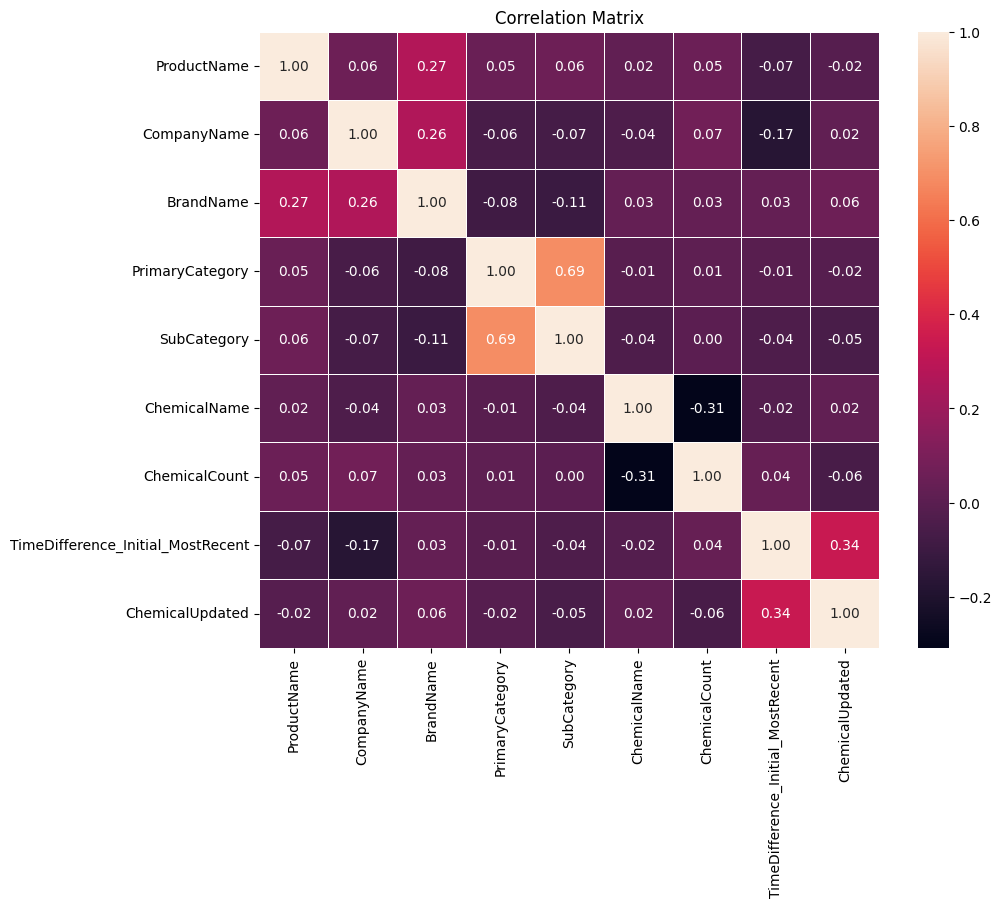

In [ ]:
# Plot the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Calculate Z-scores for each column
z_scores = stats.zscore(df)

# Define a threshold for Z-scores (here: 3 standard deviations)
threshold = 3
outliers = (abs(z_scores) > threshold).all(axis=1)

# Remove outliers from the dataset
df_no_outliers = df[~outliers]

# Verify the shape of the new dataset
print("Original shape:", df.shape)
print("Shape after removing outliers:", df_no_outliers.shape)

Original shape: (76603, 9)
Shape after removing outliers: (76603, 9)


In [ ]:
# 'ChemicalCount' is the target variable
X = df.drop('ChemicalCount', axis=1)  # Features
y = df['ChemicalCount']  # Target variable

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')

MAE: 0.38225051208000227
MSE: 0.30947773235390436
R-squared: 0.10760600932359288


Random Forest Regresson


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split= 5)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, rf_predictions)
mae = mean_absolute_error(y_test, rf_predictions)
r2 = r2_score(y_test, rf_predictions)

# Perform k-fold cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rf_rmse_scores = np.sqrt(-rf_cv_scores)

# Print the metrics
print("Random Forest Regression Cross-Validation RMSE Scores:", rf_rmse_scores)
print("Mean RMSE:", rf_rmse_scores.mean())


y_pred_rf = rf_model.predict(X_test)
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Test MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Test R-squared:", r2_score(y_test, y_pred_rf))

Random Forest Regression Cross-Validation RMSE Scores: [0.32007429 0.33690808 0.32445376 0.33438226 0.32885276]
Mean RMSE: 0.32893423114188264
Test RMSE: 0.332526537898747
Test MAE: 0.17009884449440607
Test R-squared: 0.681154822631425


linear regression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, lr_predictions)
mae = mean_absolute_error(y_test, lr_predictions)
r2 = r2_score(y_test, lr_predictions)
print(f"Linear Regression Mean Squared Error: {mse:.2f}")
print(f"Linear Regression Mean Absolute Error: {mae:.2f}")
print(f'R-squared: {r2}')

Linear Regression Mean Squared Error: 0.31
Linear Regression Mean Absolute Error: 0.38
R-squared: 0.10760600932359288


In [ ]:
#  Select random 10 rows
random_rows = df.sample(10, random_state=42)  # You can adjust the random_state for reproducibility

#  Use trained models to predict Chemical Count
random_rows_X = random_rows.drop('ChemicalCount', axis=1)

# Linear Regression
lr_predictions = lr_model.predict(random_rows_X)

# Random Forest Regression
rf_predictions = rf_model.predict(random_rows_X)

#Create a table
prediction_table = pd.DataFrame({
    'Actual_ChemicalCount': random_rows['ChemicalCount'].values,
    'Linear_Regression': lr_predictions,
    'RandomForest_Regression': rf_predictions,
})

# Display the prediction table
print(prediction_table)

   Actual_ChemicalCount  Linear_Regression  RandomForest_Regression
0                     1           1.233316                 1.059180
1                     1           1.191455                 1.015550
2                     2           1.933012                 1.897425
3                     1           1.146545                 1.057745
4                     1           1.246557                 1.059180
5                     1           1.170225                 1.059180
6                     1           1.368213                 1.865851
7                     1           1.222522                 1.135101
8                     1           1.266452                 1.066319
9                     1           1.339858                 1.131926
